# **Практика 4: Атака DeepFool на модели ИИ**
Выполнил студент группы ББМО-01-23 Бакин Д.И.

**Цель задания:**

Изучить атаку DeepFool, которая предназначена для минимальных изменений в изображениях с
целью изменения их классификации. Научиться использовать эту атаку и исследовать влияние противоречивых примеров на обученные модели.

**Задачи:**

1. Загрузить ранее обученную модель на датасете MNIST.
2. Изучить теоретические основы атаки DeepFool.
3. Реализовать атаку DeepFool с помощью фреймворка Foolbox.
4. Оценить точность модели на противоречивых примерах и сравнить с результатами на обычных данных.


# **Шаги выполнения:**
## **Шаг 1: Загрузка обученной модели и данных MNIST**
Мы начнем с загрузки обученной модели и данных MNIST, которые будем спользовать для проведения атаки.


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# Загрузка тестовых данных MNIST
(_, _), (test_images, test_labels) = mnist.load_data()
# Нормализация данных
test_images = test_images / 255.0
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
# Загрузка обученной модели
model = tf.keras.models.load_model('/content/mnist_model.h5')
# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0998
Test accuracy on clean images: 0.9754999876022339


## **Шаг 2: Теория атаки DeepFool**
Атака DeepFool — это метод, который был разработан для минимального изменения изображений с
целью заставить классификационную модель ошибиться. В отличие от других атак, таких как FGSM,
DeepFool находит минимальные изменения в пространстве признаков, которые достаточны для
изменения предсказания модели. Это делает DeepFool более эффективной в создании
противоречивых примеров с минимальным изменением входных данных.

## **Шаг 3: Реализация атаки DeepFool с использованием Foolbox**
Для выполнения атаки DeepFool мы будем использовать библиотеку Foolbox, которая поддерживает
различные атаки на модели ИИ, включая DeepFool.

In [5]:
# Установка Foolbox:
!pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00


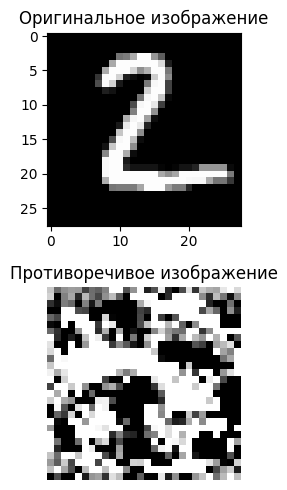

In [58]:
# Реализация атаки DeepFool:
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Инициализация Foolbox модели
fmodel = fb.TensorFlowModel(model, bounds=(-1, 1))
# Создание атаки DeepFool
attack = fb.attacks.L2DeepFoolAttack(steps=10)
# Создание подграфиков для отображения результатов
plt.figure(figsize=(10, 5))
# Выбор изображения для атаки
image = tf.convert_to_tensor(test_images[1], dtype=tf.float32)[None, ...]
label = np.argmax(test_labels[1])
label = tf.convert_to_tensor(label, dtype=tf.int64)
# Выполнение атаки
adversarial_image, _, success = attack(fmodel, image, label[None], epsilons=0.01)
# Отображение оригинального и противоречивого изображений
plt.subplot(2, 1, 1)
plt.title(f"Оригинальное изображение")
plt.imshow(image[0].numpy(), cmap="gray")
plt.subplot(2, 1, 2)
plt.title(f"Противоречивое изображение")
plt.imshow(adversarial_image[0].numpy(), cmap="gray")
plt.axis('off')
plt.tight_layout()
plt.show()


In [61]:

adversarial_images = []
for i in range(len(test_images)):
    image = tf.convert_to_tensor(test_images[i], dtype=tf.float32)[None, ...]
    label = np.argmax(test_labels[i])
    label = tf.convert_to_tensor(label, dtype=tf.int64)
    adversarial_images.append(advs)
adversarial_images = tf.concat(adversarial_images, axis=0)
adversarial_loss, adversarial_acc = model.evaluate(adversarial_images, test_labels)
print(f'Accuracy on adversarial examples (DeepFool): {adversarial_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1044 - loss: 59.9639
Accuracy on adversarial examples (DeepFool): 0.0982000008225441


## **Шаг 5: Сравнение результатов**
Как и ожидали, что точность модели на противоречивых примерах, созданных с помощью атаки DeepFool, значительно снизилась по сравнению с чистыми данными. Это демонстрирует уязвимость модели перед атаками, даже если изменения в изображении минимальны.

**Вывод:**

Точность модели составила меньше 0.1%.